In [40]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('models/AAPL_model.h5')

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from dotenv import load_dotenv, dotenv_values
import os

load_dotenv(override=True)  # take environment variables from .env file

API_KEY = os.getenv('API_KEY')
symbol = 'AAPL'


In [62]:
def scale_data(df):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(np.array(df).reshape(-1, 1))
    return scaled_data

def split_data(data):
  training_size = int(len(data)*0.8)
  test_size = len(data) - training_size

  train_data = data[0:training_size, :]
  test_data = data[training_size:len(data), :1]

  return train_data, test_data, training_size, test_size

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step- 1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [63]:
def fetch_stock_data(symbol, api_key):
    url = (
        f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY'
        f'&symbol={symbol}&apikey={api_key}&outputsize=full&datatype=csv'
    )
    df = pd.read_csv(url)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.sort_values('timestamp', inplace=True)
    return df.reset_index(drop=True)


def preprocess_data(df):
    data = df['close'].dropna().values
    return data

In [71]:
data = fetch_stock_data( symbol, API_KEY)

KeyError: 'timestamp'

In [ ]:
data

,timestamp,open,high,low,close,volume
0,2010-06-29,19.00,25.0000,17.54,23.89,18766300
1,2010-06-30,25.79,30.4192,23.30,23.83,17187100
2,2010-07-01,25.00,25.9200,20.27,21.96,8218800
3,2010-07-02,23.00,23.1000,18.71,19.20,5139800
4,2010-07-06,20.00,20.0000,15.83,16.11,6866900
...,...,...,...,...,...,...
3789,2025-07-23,330.90,336.2000,328.67,332.56,92553756
3790,2025-07-24,310.00,310.1500,300.41,305.30,156966023
3791,2025-07-25,308.74,323.6300,308.01,316.06,148227027
3792,2025-07-28,318.45,330.4900,315.69,325.59,112673755


In [29]:
data1 = preprocess_data(data)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data1.reshape(-1, 1))


train_data, test_data, training_size, test_size = split_data(scaled_data)

# Create datasets for training/testing
X_train, y_train = create_dataset(train_data, 100)
X_test, y_test = create_dataset(test_data, 100)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [30]:

test_predict=model.predict(X_test)
y_predicted = scaler.inverse_transform(test_predict)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # ytest is your true test labels


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


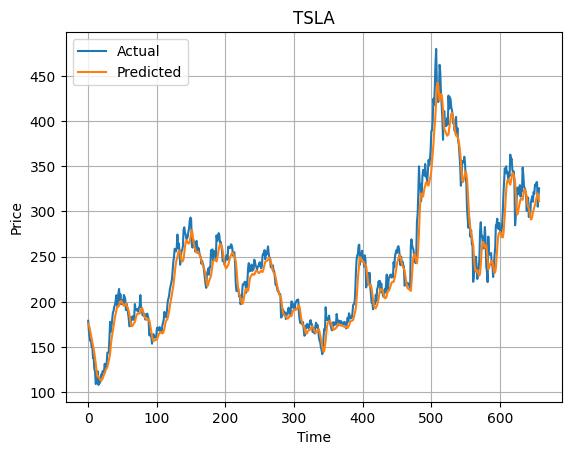

In [31]:
plt.title(symbol)
plt.plot(y_actual, label='Actual')
plt.plot(y_predicted, label='Predicted')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
accuracy = 100 - mape

print(f"MAPE {symbol}:  {mape:.2f}%")
print(f"Accuracy (approx) {symbol}: {accuracy:.2f}%")

MAPE TSLA:  4.68%
Accuracy (approx) TSLA: 95.32%


In [2]:
# model = load_model('MSFT_model2.h5')

# data2 = fetch_stock_data( symbol, API_KEY)
# data3 = preprocess_data(data2)

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_data = scaler.fit_transform(data3.reshape(-1, 1))


# train_data, test_data, training_size, test_size = split_data(scaled_data)

# # Create datasets for training/testing
# X_train, y_train = create_dataset(train_data, 100)
# X_test, y_test = create_dataset(test_data, 100)
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# test_predict=model.predict(X_test)
# y_predicted = scaler.inverse_transform(test_predict)
# y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # ytest is your true test labels
# plt.title(symbol)
# plt.plot(y_actual, label='Actual')
# plt.plot(y_predicted, label='Predicted')
# plt.legend()
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.grid(True)
# plt.show()



In [3]:
mape = np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
accuracy = 100 - mape

print(f"MAPE {symbol}:  {mape:.2f}%")
print(f"Accuracy (approx) {symbol}: {accuracy:.2f}%")

NameError: name 'np' is not defined